# 1

In [20]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## a

In [3]:
iris = load_iris()
description = iris.DESCR
description

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

## b

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

## c

In [21]:
X = iris_df.drop(columns='target')
y = iris_df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the dataset

# Split the scaled dataset into training and testing sets with a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## d

In [22]:
max_iter_values = [100, 500, 1000, 5000, 10000]
r2_scores = []

for max_iter in max_iter_values:
    model = LogisticRegression(max_iter=max_iter, solver='lbfgs', multi_class='auto')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

## e

In [15]:
r2_scores_df = pd.DataFrame({
    'Max Iterations': max_iter_values,
    'R2 Scores': r2_scores
})

print(r2_scores_df)

   Max Iterations  R2 Scores
0             100        1.0
1             500        1.0
2            1000        1.0
3            5000        1.0
4           10000        1.0


# 2

### Split the dataset into training and testing sets with a 60:40 ratio

In [23]:
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Initialize a list to store R2 scores for the 60:40 split
r2_scores_60 = []

for max_iter in max_iter_values:
    model = LogisticRegression(max_iter=max_iter, solver='lbfgs', multi_class='auto')
    model.fit(x_train_60, y_train_60)
    y_pred_60 = model.predict(x_test_60)
    r2 = r2_score(y_test_60, y_pred_60)
    r2_scores_60.append(r2)

### Split the dataset into training and testing sets with an 80:20 ratio

In [24]:
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
r2_scores_80 = []

for max_iter in max_iter_values:
    model = LogisticRegression(max_iter=max_iter, solver='lbfgs', multi_class='auto')
    model.fit(x_train_80, y_train_80)
    y_pred_80 = model.predict(x_test_80)
    r2 = r2_score(y_test_80, y_pred_80)
    r2_scores_80.append(r2)

# 3

In [18]:
import matplotlib.pyplot as plt

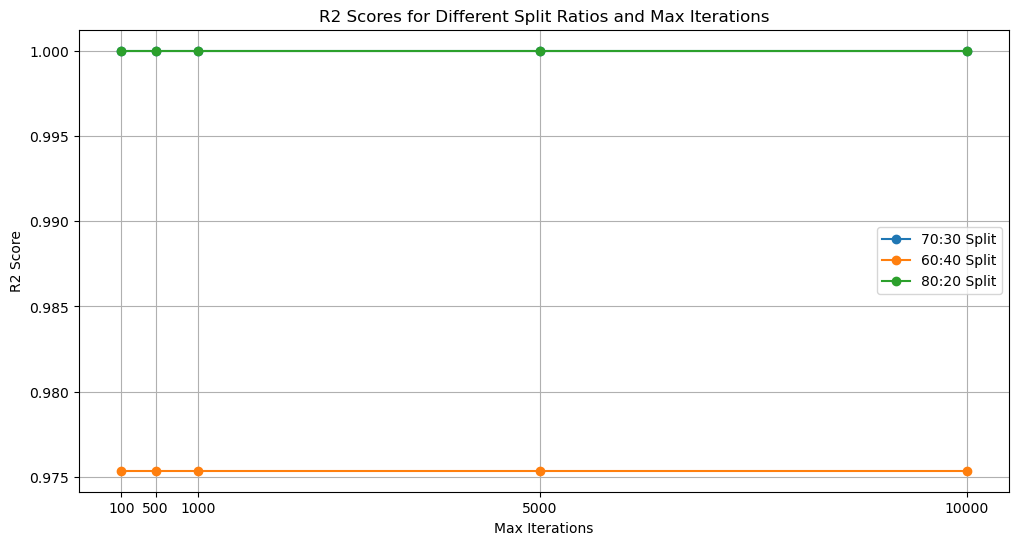

In [25]:
# Plotting the R2 scores
plt.figure(figsize=(12, 6))

# Plot for 70:30 split
plt.plot(max_iter_values, r2_scores, marker='o', label='70:30 Split')

# Plot for 60:40 split
plt.plot(max_iter_values, r2_scores_60, marker='o', label='60:40 Split')

# Plot for 80:20 split
plt.plot(max_iter_values, r2_scores_80, marker='o', label='80:20 Split')

# Adding titles and labels
plt.title('R2 Scores for Different Split Ratios and Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('R2 Score')
plt.xticks(max_iter_values)  # Set x-ticks to be the max_iter values
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid for better readability

# Show the plot
plt.show()